## Sentiment Analysis
Imagine you could know the mood of the people on the Internet. Maybe you are not interested in its entirety, but only if people are today happy on your favorite social media platform. 


Reading the mood from text with machine learning is called sentiment analysis, and it is one of the prominent use cases in text classification. This falls into the very active research field of natural language processing (NLP). Other common use cases of text classification include detection of spam, auto tagging of customer queries, and categorization of text into defined topics.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving yelp_labelled.txt to yelp_labelled.txt


In [ ]:
uploaded = files.upload()

Saving amazon_cells_labelled.txt to amazon_cells_labelled.txt


In [ ]:
uploaded = files.upload()

Saving imdb_labelled.txt to imdb_labelled.txt


In [ ]:
import pandas as pd

filepath_dict = {'yelp':   'yelp_labelled.txt',
                 'amazon': 'amazon_cells_labelled.txt',
                 'imdb':   'imdb_labelled.txt'}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name
    df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[0])

sentence    Wow... Loved this place.
label                              1
source                          yelp
Name: 0, dtype: object


**Defining a Baseline Model**

When you work with machine learning, one important step is to define a baseline model. This usually involves a simple model, which is then used as a comparison with the more advanced models that you want to test. In this case, you’ll use the baseline model to compare it to the more advanced methods involving (deep) neural networks, the meat and potatoes of this tutorial.

In [ ]:
# to do 
# NLP preprocess the data

In [ ]:
from sklearn.model_selection import train_test_split

df_yelp = df[df['source'] == 'yelp']

sentences = df_yelp['sentence'].values
y = df_yelp['label'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [ ]:
# embedding
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<750x1714 sparse matrix of type '<class 'numpy.int64'>'
	with 7368 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)


Accuracy: 0.796


In [ ]:
for source in df['source'].unique():
    df_source = df[df['source'] == source]
    sentences = df_source['sentence'].values
    y = df_source['label'].values

    sentences_train, sentences_test, y_train, y_test = train_test_split(
        sentences, y, test_size=0.25, random_state=1000)

    vectorizer = CountVectorizer()
    vectorizer.fit(sentences_train)
    X_train = vectorizer.transform(sentences_train)
    X_test  = vectorizer.transform(sentences_test)

    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    print('Accuracy for {} data: {:.4f}'.format(source, score))

Accuracy for yelp data: 0.7960
Accuracy for amazon data: 0.7960
Accuracy for imdb data: 0.7487


In [ ]:
# to do
# implement various classification methods 
# DT, RF, K-NN, Naive Bayes, SVM

These should be focus of People who only know machine learning so far.

1. Get the best f1 score with sentiment classification.
2. Print out classification reports.
3. Hypertune your parameters in algorithms.

In [ ]:
# also implement tf-idf vectorizer for better embedding.
# hypertune ML algos for better performance

# Movie Review Classification

In [ ]:
import numpy as np 
import pandas as pd 
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re
import random
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')
lemmatizer = WordNetLemmatizer()

#set random seed for the session
random.seed(1)
np.random.seed(1)

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train.tsv to train.tsv
User uploaded file "train.tsv" with length 8481022 bytes


In [ ]:
#load train data
train=pd.read_csv("train.tsv",sep='\t')
print(train.shape)
train.head()

(156060, 4)


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test.tsv to test.tsv
User uploaded file "test.tsv" with length 3367149 bytes


In [ ]:
#load test data
test=pd.read_csv("test.tsv",sep='\t')
print(test.shape)
test.head()

(66292, 3)


,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [ ]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def clean_sentences(df):
    reviews = []

    for sent in tqdm(df['Phrase']):
        
        #remove html content
        review_text = BeautifulSoup(sent).get_text()
        
        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)
    
        #tokenize the sentences
        words = word_tokenize(review_text.lower())
    
        #stop words removal
        omit_words = set(stopwords.words('english'))
        words = [x for x in words if x not in omit_words]
        
        #lemmatize each word to its lemma
        lemma_words = [lemmatizer.lemmatize(i) for i in words]
    
        reviews.append(lemma_words)

    return(reviews)

#cleaned reviews for both train and test set retrieved
train_sentences = clean_sentences(train)
test_sentences = clean_sentences(test)
print(len(train_sentences))
print(len(test_sentences))

100%|██████████| 66292/66292 [00:35<00:00, 1893.63it/s]

156060
66292


In [ ]:
target=train.Sentiment.values

# Set values for various parameters of word2vec
num_features = 200  # Word vector dimensionality. Determines the no of words each word in the vocabulary will
#be associated with. Must be tuned.
min_word_count = 5   # Minimum word count. Words occuring below the threshold will be ignored
num_workers = 1       # Number of threads to run in parallel
context = 5         # Context window size to be considered for each word                                             
downsampling = 1e-3   # Downsample setting for frequent words. To prevent more frequent words from dominating.

In [ ]:
from gensim.models import word2vec

#Model Word2Vec
model = word2vec.Word2Vec(train_sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If the model is not going to be trained further, init_sims can be called 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

In [ ]:
model.wv.index2word[3]

'one'

In [ ]:
#the word2vec builds associations for each word with other words in the vocabulary of the problem.
#the model can be used to test differnt word associations. similarities, etc. to know how good the model
#or the vocabulary is. In the example here, 4 words are given and the model chosses the dissimilar word amonsgt them.
#here it chooses length. Good Bad & Nice are adjectives to describe a movie, 'Length' is something.
#Hence the model has built this association.
print(model.wv.doesnt_match("Good Bad Nice Length".split()))

ValueError: ignored

In [ ]:
#print the three most common words
print(model.wv.index2word[0], model.wv.index2word[1], model.wv.index2word[2], model.wv.index2word[3])

film movie n one


In [ ]:
#print the three least common words
total_words = len(model.wv.vocab)
print(model.wv.index2word[total_words - 1], model.wv.index2word[total_words - 2], model.wv.index2word[total_words - 3])

conceivable gracious hirosue


In [ ]:
#print the most similar words associated with 'actor'. The word 'role' and 'lead' appears at the top.
print(model.wv.most_similar("actor"))

[('lead', 0.9020463228225708), ('jacobi', 0.8972994089126587), ('mcdormand', 0.8700575232505798), ('dicaprio', 0.8624231815338135), ('gawky', 0.8603272438049316), ('role', 0.8563158512115479), ('hamming', 0.8428905606269836), ('leery', 0.8409398794174194), ('niro', 0.8324480056762695), ('clarify', 0.8288060426712036)]


In [ ]:
def createFeatureVector(words, model, num_features):
    #initialize a 1D array with length as num of features of word2vec model chosen by us. 
    #Here it is 200.
    featVector = np.zeros((num_features,),dtype="float32")
    
    nWords = 0
    
    # Index2word is a list that contains the names of the words in 
    # the model's vocabulary. Convert it to a set, as set is faster
    index2word_set = set(model.wv.index2word)
    
    # Loop over each word and add it to the feature vector to get the total sum of feature vectors of the
    #entire review
    for word in words:
        if word in index2word_set: 
            nWords = nWords + 1.
            featVector = np.add(featVector,model[word])
            
    # Divide the result by the number of words to get the average of the feature vectors of 
    #all words in the review
    if(nWords != 0):
        featVector = np.divide(featVector,nWords)
    return featVector

#calculates the average of the feature vectors for each review using the word2vec values assigned for 
#each word
def avgFeatureVectors(sentences, model, num_features):
    overallFeatureVectors = []
    for sentence in tqdm(sentences):
        overallFeatureVectors.append(createFeatureVector(sentence, model, num_features)) 
    return overallFeatureVectors

train_vect = avgFeatureVectors( train_sentences, model, num_features )
test_vect = avgFeatureVectors( test_sentences, model, num_features )

100%|██████████| 66292/66292 [01:10<00:00, 944.47it/s]


In [ ]:
#split into train and validation sets.
X_train,X_val,y_train,y_val=train_test_split(train_vect,target,test_size=0.2,stratify=target)
from sklearn.ensemble import RandomForestClassifier

#Model RF
model_rf = RandomForestClassifier(random_state=1, n_estimators=500, verbose=1, n_jobs=-1, oob_score=True)
model_rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 14.2min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=1, verbose=1,
                       warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# the score for the trained model. Here it is around 62%. It can be further increased, by fine-tuning
#word2vec model as well as rf model using possibly grid search.
result = model_rf.predict( X_val )
score = accuracy_score(y_val,result)
print(score)
print (classification_report(y_val,result))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    3.5s


0.6245995130078175
              precision    recall  f1-score   support

           0       0.47      0.33      0.39      1414
           1       0.53      0.41      0.46      5455
           2       0.68      0.82      0.75     15916
           3       0.55      0.47      0.51      6586
           4       0.50      0.34      0.41      1841

    accuracy                           0.62     31212
   macro avg       0.55      0.47      0.50     31212
weighted avg       0.61      0.62      0.61     31212



[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    4.0s finished


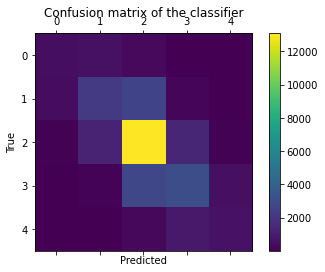

[[  470   568   338    35     3]
 [  422  2214  2611   198    10]
 [  103  1233 13091  1424    65]
 [    6   143  2803  3092   542]
 [    2    13   302   896   628]]


In [ ]:

# visualizing the confusion matrix of the results. As expected the category of neutral ('2') is the best
# performing as more no of records in the dataset belong to this class. Other classes are little
# under-represented and hence not learnt well by the model. Over-sampling, Under-sampling or combination 
# of both can mitigate this problem to a degree. 
# Also SMOTE can be tried to create synthetic samples for
# under-represented classes to balance the equation little bit. Class weights is also another option
# that can be used to tell the model to pay more attention to certain classes while training.

labels = [0,1,2,3,4]
conf = confusion_matrix(y_val,result,labels)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(conf)

## Multiclassifcation with LSTMs



This section is valid for people who have finished Neural Networks.

1. Make a bigger  network using LSTM cells or GRU.
2. Handle the unbalance in data
3. Avoid overfitting
4. Find the dataset here : https://archive.ics.uci.edu/ml/machine-learning-databases/00359/

Put this file directly on your gdrive.



In [ ]:
import numpy as np 
import pandas as pd 
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/My\ Drive/data

/content/drive/My Drive/data


In [ ]:
data = pd.read_csv('uci-news-aggregator.csv', usecols=['TITLE', 'CATEGORY'])

In [ ]:
# M class has way less data than the others, thus the classes are unbalanced.
data.CATEGORY.value_counts()

e    152469
b    115967
t    108344
m     45639
Name: CATEGORY, dtype: int64

In [ ]:
# Lets have balanced classes
num_of_categories = 45000
shuffled = data.reindex(np.random.permutation(data.index))
e = shuffled[shuffled['CATEGORY'] == 'e'][:num_of_categories]
b = shuffled[shuffled['CATEGORY'] == 'b'][:num_of_categories]
t = shuffled[shuffled['CATEGORY'] == 't'][:num_of_categories]
m = shuffled[shuffled['CATEGORY'] == 'm'][:num_of_categories]
concated = pd.concat([e,b,t,m], ignore_index=True)
#Shuffle the dataset
concated = concated.reindex(np.random.permutation(concated.index))
concated['LABEL'] = 0

In [ ]:
#One-hot encode the labels
concated.loc[concated['CATEGORY'] == 'e', 'LABEL'] = 0
concated.loc[concated['CATEGORY'] == 'b', 'LABEL'] = 1
concated.loc[concated['CATEGORY'] == 't', 'LABEL'] = 2
concated.loc[concated['CATEGORY'] == 'm', 'LABEL'] = 3
print(concated['LABEL'][:10])
labels = to_categorical(concated['LABEL'], num_classes=4)
print(labels[:10])
if 'CATEGORY' in concated.keys():
    concated.drop(['CATEGORY'], axis=1)

60182     1
11671     0
140786    3
54117     1
57778     1
130357    2
34549     0
48676     1
158565    3
82376     1
Name: LABEL, dtype: int64
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [ ]:
n_most_common_words = 8000
max_len = 130
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(concated['TITLE'].values)
sequences = tokenizer.texts_to_sequences(concated['TITLE'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=max_len)

Found 51808 unique tokens.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , labels, test_size=0.25, random_state=42)

In [ ]:
epochs = 10
emb_dim = 128
batch_size = 256
labels[:2]

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [ ]:
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

((135000, 130), (135000, 4), (45000, 130), (45000, 4))
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 130, 128)          1024000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 130, 128)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 4)                 260       
Total params: 1,073,668
Trainable params: 1,073,668
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
422/422 [==============================] - 259s 563ms/step - loss: 1.0341 - acc: 0.5415 - val_loss: 0.3024 - val_acc: 0.8979
Epoch 2/10
422/422 [============================

In [ ]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1407/1407 [==============================] - 40s 29ms/step - loss: 0.2217 - acc: 0.9254
Test set
  Loss: 0.222
  Accuracy: 0.925


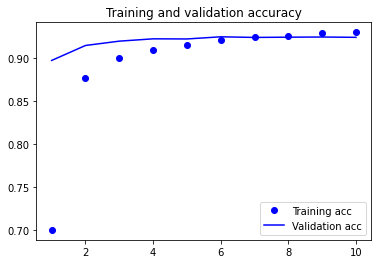

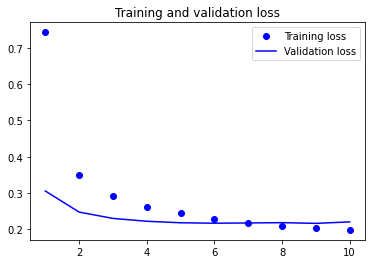

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
txt = ["Regular fast food eating linked to fertility issues in women"]
# txt = ["Prime minister invoked a feeling pride in citizens over republic day speech"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
labels = ['entertainment', 'bussiness', 'science/tech', 'health']
print(pred, labels[np.argmax(pred)])

[[0.9887748  0.00608882 0.00303348 0.00210289]] entertainment
